# Введение в линейную регрессию

Линейная регрессия очень мощная техника моделирования которая может быть использована для понимания взаимоотношения между колличественными переменны и одной или более другими переменными, иногда с целью предстаказать будущий результат. Например, линейная регрессия может нам помочь ответить на вопросы
- какая взаимосвязь между размером квартиры и платой за аренду ?
- является ли рост матери хорошим предсказателем того что рост ее детей будет зависить от роста родителя ?

Первым шагом перед наполнением модели линейной регрессии является исследовательский анализ данных и их визуализация.

Например, представьте что мы собрали данные о росте (в см) и весу (в кг) для 9 взрослых и исследуем диаграмму соотношения роста к весу

![](./img/6_1.png)

Когда мы смотрим на данную диаграмму, мы видим что есть некоторые свидетельства взаимосвязи между ростом и весом: люди, которые выше, как правило, весят больше.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# загрузим данные из файла ./files/test_data.csv
students = pd.read_csv('./files/test_data.csv')

# посмотрим первые несколько строк
print(students.head())

   score  hours_studied  breakfast
0   73.5            2.7          0
1   92.2            4.1          1
2   55.4            2.5          0
3   64.6            1.6          1
4   66.9            1.4          0


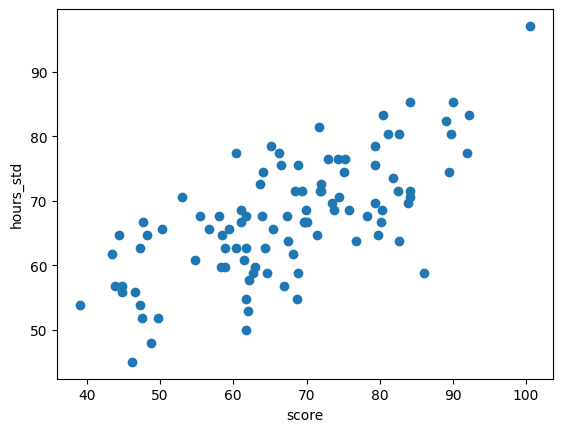

In [2]:
y = 9.85 * students.hours_studied + 43

plt.scatter(students.score, y)
plt.xlabel('score')
plt.ylabel('hours_std')
plt.show()

## Уравнение прямой

Как следует из названия, ЛИНЕЙНАЯ регрессия подразумевает подгонку линии к набору точек данных. Чтобы подгонять линию, полезно понимать уравнение для линии, которое часто замсывается как *`y=mx+b`*. Где:
- *x* и *y* представляют собой переменные, такие как рост и вес или часы обучения и баллы за тест
- *b* представляет собой точку пересения линии с осью **Y**. Это точка пересечения линии с осью **Y** (вертикальная линия, расположенная в точке x = 0)
- *m* представляет собой уклон. Это контролирует, насколько крутой будет линия. Если мы выберем любые две точки на линии, уклон будет отношением вертикального и горизонтального расстояния между этими точками. это часто записывают как rise/run

На следующем графике показана линия с уравнение *`y = 2x + 12`*

![](./img/6_2.png)

Обратите внимане, что у нас также может быть линия с отрицательным наклоном. Например, следующий график показывает линию с уравнением *`y = -2x + 8`*

![](./img/6_3.png)

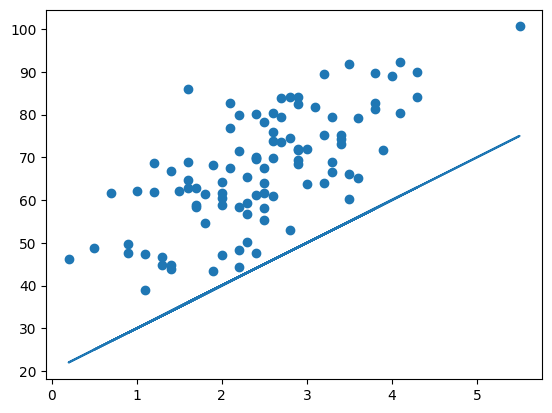

In [5]:
# Давайте снова построим график данных score и hours_studied с линией проходящей через точки.
predicted_score = 10 * students.hours_studied + 20

plt.scatter(students.hours_studied, students.score)
plt.plot(students.hours_studied, predicted_score)
plt.show()

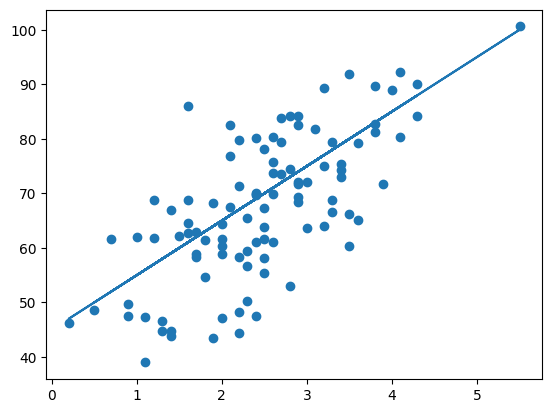

In [6]:
# линия практически параллельна данным но находится ниже них
# отредактируйте формулу таким образом чтобы точка пересечения с осью равнялась 45
predicted_score = 10 * students.hours_studied + 45

plt.scatter(students.hours_studied, students.score)
plt.plot(students.hours_studied, predicted_score)
plt.show()

## Поиск "лучшей" линии

По средствам кода выше мы попытались на глаз прикинуть, как может выглядеть наиболее подходящая линия. ЧТобы на самом деле выбрать линию, нам нужно придумать некоторые критерии того, что на самом деле означает "лучшая".

В зависимости от нашиз конечных целей и данных мы можем выбирать различные критерии; однако, общим выбором для линейной регрессии является обычный **метод наименьших квадратов** (**МНК**). В простой регрессии МНК мы предполагаем, что связь между двумя переменными *x* и *y* может быть смоделирована следующим образом:

*`y = mx + b + error`*

Мы определяем "лучшуй" как линию, которая минимизирует общую квадратичную ошибку для всех точек данных. Эта общая квадратичная ошибка называется **функцией потерь** в машинном обучении. Например, рассмотрим следующий график:

![](./img/6_4.png)

На этом графике мы видим две точки по обе стороны от линии. Одна из точек находится на одну единицу ниже линии (обозначена как -1). Другая точка находится на три единицы выше линии (обозначена как 3). Общая квадратичная ошибка (потеря) равна:

*`потеря = (-1)^2 + (3)^2 = 1 + 9 = 10`*

Обратите внимание, что мы возводим в квадрат каждое отдельное расстояние, так что точки ниже и выше линии вносят одинаковый вклад в потери (когда мы возводим в квадрат отрицательное число, результат положительный). Чтобы найти наиболее подходящую линию, нам нужно найти наклон и точку пересечения линии, которая минимизирует потери.

## Подгонка модели линейной регрессии на Python

Существуют ряд библиотек Python, которые можно использовать для подгонки линейной регрессии, но мы будем использовать функцию **OLS.from_formula()** поскольку **statsmodels.api** она использует простой синтаксис и предоставляет исчерпывающие сводки модели.

Предположим, у нас есть набор данных с именем `body_measurements` со столбцами `height` и `weight`. Если мы хотим подогнать модель, которая может предстказывать вес на основе роста, мы можем создать модель следующим образом:

*`model = sm.OLS.from_formula('wight ~ height', data = body_measurements)`*

Мы использовали формулу, *`'weight ~ height'`* потому что мы хотим предсказать `weight` (это переменная результата), используя `height` в качестве предиктора. Затем мы можем подогнать модель, используя *`.fit()`*

*`results = model.fit()`*

Наконец, мы можем просмотреть сводку результатов, используя *`print(results.summary())`*. Сейчас мы рассмотрим только коэффициенты, используя `results.params`, но полная сводная таблица полеза, поскольку содержит другую важную диагностическую информацию:

*`print(results.params)`*

Параметры:
- intercept - показывает чему равно наиболее подходящая точка пересечения
- второй параметр (предикта) - показываем чему равно наиболее подходящее значение наклона

In [9]:
# импортируем необходимую библиотеку
import statsmodels.api as sm

# используя наши данные создайте модель линейной регрессии, которая прогнозирует `score` используя `hours_studied` в роли предиктора, сохраните результат в переменную с именем model
model = sm.OLS.from_formula('score ~ hours_studied', data=students)

In [10]:
# подгоните модель с помощью метода .fit() примененного к переменной model созданного в предыдущем блоке и сохраните подобранную модель в переменную с именем results
results = model.fit()

In [ ]:
# выведите на экран коэффиценты модели, используя метод .params
print(results.params)

Intercept        43.016014
hours_studied     9.848111
dtype: float64


## Использование регрессионной модели для прогнозирования

Предположим, что у нас есть набор данных о росте и весе 100 взрослых. Мы подгоняем линейную регрессию и выводим коэффициенты.

```python
model = sm.OLS.from_formula('weight ~ height', data = body_measurements)
results = model.fit()
print(results.params)
```

Выход

```text
Intercept   -21.67
height        0.50
dtype: float64
```

Эта регрессия позволяет нам предстказать вес взрослого человека, если мы знаем его рост. Чтобы сделать прогноз, нам нужно подставить отсекаемый элемент и наклон в наше уравнение для линии. Уравнение выглядит так:

*`масса = 0.5 * высота - 21.67`*

Чтобы сделать прогноз, мы можем подставить любой рост. Например, мы можем рассчитать, что ожидаемый вес для человека ростом 160 см составит 58.33 кг:

*`масса = 0.5 * 160 - 21.67 = 58.33`*

В Python мы можем вычислить это, подставив значение или обратившись к отсекателю и наклону, *`results.params`* используя их индексы (0 и 1 соответственно)

```python
print(0.50 * 160 - 21.67) 
# Output: 58.33

# OR:

print(results.params[1]*160 + results.params[0])
# Output: 58.33
```

Мы также можем сделать этот расчет, используя `.predict()` метод на подогнанной модели. Чтобы предсказать вес человека ростом 160 см, нам нужно сначала создать новый набор данных с `height` равным 160 как показано ниже:

```python
newdata = {"height":[160]}
print(results.predict(newdata))
```

Выход

```text
0      58.33
dtype: float64
```

Обратите внимание, что мы получаем тот же результат (58.33), что и при использовании других методов; однако он возвращается в виде DataFrame-а.

In [13]:
# используя ранее расчитанные данные выведите на экран коэффициенты модели
print(results.params)

Intercept        43.016014
hours_studied     9.848111
dtype: float64


In [18]:
# Используя вашу модель, каков прогнозируемый балл для студента, который потратил 3 часа на учебу? Сохраните результат как pred_3hr и распечатайте его. Рассчитайте свой ответ, подставив в формулу для строки (вместо использования .predict())

pred_3hr = results.params.iloc[1] * 3 + results.params.iloc[0]

print(pred_3hr)

72.56034698735527


In [20]:
# каков прогнозируемый балл для студента, который потратил 5 часов на учебу? Используйте `.predict()` метод для расчета вашего ответа и сохраните его как `pred_5hr`, затем распечатайте
newdata = {'hours_studied':[5]}
pred_5hr = results.predict(newdata)

print(pred_5hr)

0    92.256569
dtype: float64


## Интерпретация регрессионной модели

Давайте снова проверим вывод для регрессии, которая предсказывает вес на основе роста. Линия регрессии выглядит примерно так

![](./img/6_5.png)

Обратите внимание, что единицы пересечения и наклона линии регрессии соответствуют единицам исходных переменных; пересечение этой линии измеряется в кг, а наклон измеряется в кг/см. Чтобы понять пересения (которые мы ранее вычислили как -21.67 кг), давайте уменьшим масштаб этого графика

![](./img/6_6.png)

Мы видим, что интерсепт - это предсказанное значение переменной результата (веса), когда предикорная переменная (рост) равна нулю. В этом случае интрпретация интерсепта такова, что человек ростом 0 см должен весить -21 кг. Это довольно бессмысленно, потому что невозможно, чтобы кто-то был ростом 0 см!

Однако в других случаях это значение имеет смысл и его полезно интерпретировать. Например, если бы мы прогнозировали продажи мороженого на основе температуры, то отсекаемым значеним были бы ожидаемые рподажи при температуре 0 градусов.

Чтобы визуализировать наклон, давайте увеличим масштаб нашего графика:

![](./img/6_7.png)

Помните, что наклон можно рассматривать как подъем/пробег - отношение вертикального и горизонтального расстояния между любыми двумя точками на линии. Таким образом, наклон (который мы ранее вычислили как 0.5 кг/см) - это ожидаемая разница в выходной переменной (вес) для разницы в одну единицу в предикторной переменной (рост). Другими словами мы ожидаем что разница в один сантиметр в росте связана с дополнительными 0.5 килограммами веса.

Обратите внимание, что наклон дает нам две части информации: величину и направление связи между переменными `x` и `y`. Например, предположим, что вместо этого мы подогнали регрессию веса с минтами упражнений в день в качестве предиктора - и вычислили наклон -.1. Мы бы интерпретировали это так, что люди, которые тренируются на одну дополнительную минуту в день, как ожидается, будут весить на 0.1 кг МЕНЬШЕ.

## Предположения линейной регрессии Часть 1

Давайте снова проверим вывод для регрессии, которая предсказывает вес на основе роста. Линия регрессии выглядит примерно так:

Следующие два предположения (нормальность и гомоскедастичность) легче проверить после подгонки регрессии. Мы узнаем больше об этих предположениях далее, но сначала нам нужно вычислить две вещи: подогнанных значений и остатков.

Обратите внимание, что единицы пересечения и наклона линии регрессии соответствуют единицам исходных переменных; пересечение этой линии измеряется в кг, а наклон измеряется в кг/см. Чтобы понять пересечения (которые мы ранее вычислили как `'weight ~ height'` кг), давайте уменьшим масштаб этого графика

![](./img/6_8.png)

Мы можем вычислить подобранные значения, используя `.predict()`, передавая исходные данные. Результатом является ряд padnas, содержащий прогнозируемые значения для каждого человека в исходном наборе данных

```python
fitted_values = results.predict(body_measurements)
print(fitted_values.head())
```

Чтобы визуализировать наклон, давайте увеличим масштаб нашего графика:

```text
0    66.673077
1    59.100962
2    71.721154
3    70.711538
4    65.158654
dtype: float64
```

Остатки - это разности между каждым из этих подобранных значений и истинными значениями выходной переменной. Их можно вычислить, вычитая подобранные значения из фактических значений. Мы можем выполнить это поэлементное вычитание в Python, просто вычитая одну серию Python из другой, как показано ниже:

```python
residuals = body_measurements.weight - fitted_values
print(residuals.head())
```

Вывод

```text
0   -2.673077
1   -1.100962
2    3.278846
3   -3.711538
4    2.841346
dtype: float64
```

In [21]:
# Рассчитайте подогнанные значения для этой модели и сохраните как fitted_values
fitted_values = results.predict(students)


In [22]:
# рассчитайте остатки для этой модели и сохраните результат как residuals
residuals = students.score - fitted_values

In [ ]:
# выведите на экран несколько строк переменной residuals
print(residuals.head())

0     3.894086
1     8.806731
2   -12.236291
3     5.827009
4    10.096631
dtype: float64


## Предположения линейной регрессии Часть 2

После того, как мы рассчитали подобранные значения и остатки для модели, мы можем проверить предположения о нормальности и гомоскедастичности линейной регрессии.

### Предположение о нормальности

Предположение о нормальности гласит, что остатки должны быть распределены нормально. Это прдположение сделано, потому что статистические остатки любого независимого набора данных будут приближаться к нормальному распределению, когда набор данных достаточно большой.

Чтобы проверить предположение о нормальности, мы можем изучить гистограмму остатков и убедить, что распределение выглядит приблизительно нормально (без перекосов или множественных "горбов")

```python
plt.hist(residuals)
plt.show()
```

![](./img/6_9.png)

Эти остатки кажутся нормально распределенными что позволяет нам сделать вывод о том, что предположение о нормальности выполняется.

Если бы график выглядел примерно так, как показано на следующем графике (смещен вправо), мы бы опсались, что предположение о нормальности не выполняется

![](./img/6_10.png)

### Предположение о гомоскедастичности

Гомоскедастичность - это затейливый способ сказать, что остатки имеют одинаковую вариацию по всем значениям предикторной (независимсой) переменной. Когда гомоскедастичность не выполняется, это называется гетероскедастичностью, что означает, что варианация в размере члена ошибки различается по независимой переменной.

Поскольку линейная регрессия стремится минимизировать остатки и придает всем наблюдениям одинаковый вес, гетероскедастичность может привести к смещению результатов.

Обычный способ проверки - построение графика остатков относительно подобранных значений.

```python
plt.scatter(fitted_values, residuals)
plt.show()
```

![](./img/6_11.png)

Если предположение о гомоскедастичности выполняется, то этот график будет выглядеть как случайное разбросанное множество точек, центрированных вокруг y=0 (как в примере выше).

Есть есть какие-либо закономерности или асимметрия, это будет означать, что предположение НЕ выполняется и линейная регрессия может быть неподходящией. Например:

![](./img/6_12.png)

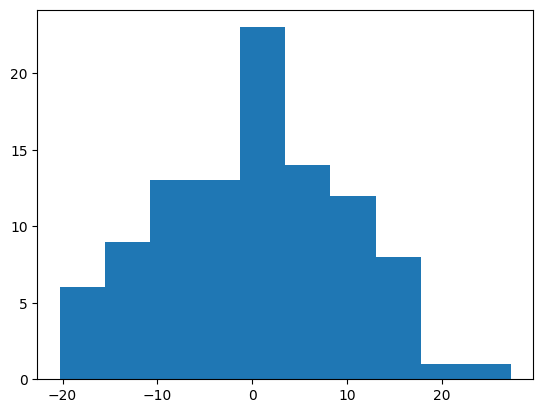

In [24]:
# постройте гистограмму остатков, чтобы проверить предположение о нормальности. Выполняется ли это предположение?
plt.hist(residuals)
plt.show()

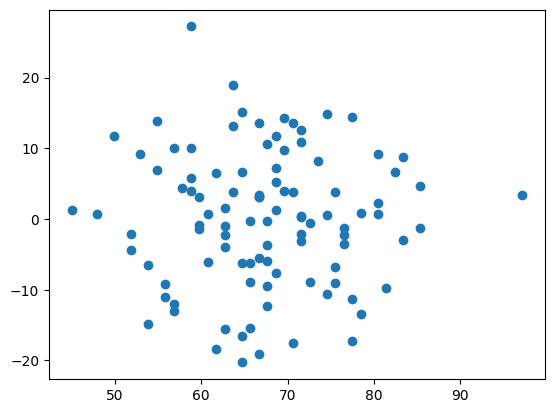

In [25]:
# проверьте предположение о гомоскедастичности, построив график остатков к подобранным значениям (fitted_values по оси X и residuals по оси Y). Выполняется ли это предположение?
plt.scatter(x=fitted_values, y=residuals)
plt.show()

## Категорийные предикторы

Ранее мы использовали количественный предиктор в нашей линейной регрессии, но важно отметить, что мы также можем использовать категориальные предикторы. Простейшим случаем категориального предиктора является бинарная переменная (которая может принимать только два значения)

Например, предположим, что мы опросили 100 взрослых и попросили их сообщить свой рост в см и то, играют ли они в баскетбол. Мы закодировали переменную `bball_player` так, чтобы она была равна тому
- 1 - играет
- 0 - не играет

График `height` зависимости `bball_player` приведен ниже

![](./img/6_13.png)

Мы видим, что люди, которые ирают в баскетбол, как правило, выше тех, кто не играет. Как и прежде, мы можем провести линию, чтобы сопоставить эти точки. ПОдумайте на минутку, как может выглядеть эта линия ?

Вы могли бы догадаться (правильно!), что наилучшая линия соответствия для этого графика - так, которая проходит через среднюю высоту для каждой группы. Чтобы воссоздать диаграмму рассеивания с наилучшей линией соответствия, мы могли бы использовать следующий код

```python
# Calculate group means
print(data.groupby('play_bball').mean().height)
```

Вывод

```text
	play_bball
0	169.016
1	183.644
```

```python
# Create scatter plot
plt.scatter(data.play_bball, data.height)

# Add the line using calculated group means
plt.plot([0,1], [169.016, 183.644])

# Show the plot
plt.show()
```

В результате будет получен следующий график (без дополнительных меток и цветов):

![](./img/6_14.png)

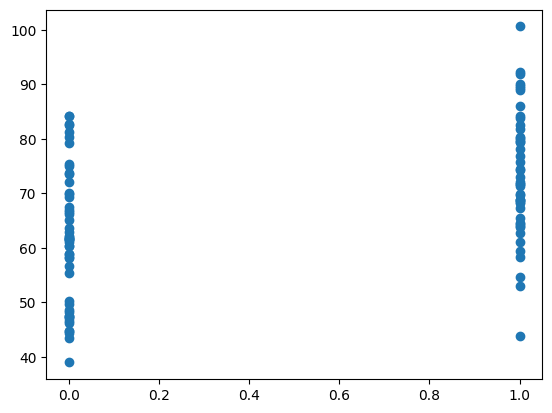

In [27]:
# используя наш набор students, постройте диаграмму рассеивания score (ось Y) относительно breakfast (ось X), чтобы увидеть баллы учащихся, которые завтрали и не завтракали

plt.scatter(y=students.score, x=students.breakfast)

plt.show()

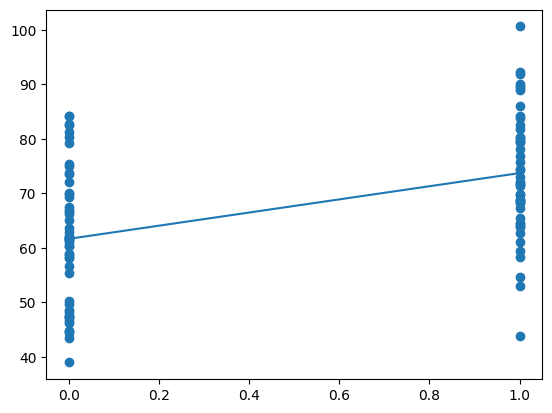

In [30]:
# постройте второй график на котором будет отображена линия соединяющая средние значения
plt.scatter(x=students.breakfast, y=students.score)
plt.plot(students.breakfast.unique(), students.groupby('breakfast').mean().score)
plt.show()

## Категориальные предикторы: соответствие и интерпретация

Теперь, когда мы увидели, как визуально выглядит регрессионная модель с бинарным предиктором, мы можем фактически подошнать модель с помощью `statsmodels.api.OLS.from_formula()`, так же, как мы это делали для количественного предиктора:

```python
model = sm.OLS.from_formula('height ~ play_bball', data)
results = model.fit()
print(results.params)
```

Вывод

```text
Intercept     169.016
play_bball     14.628
dtype: float64
```

Обратите внимание, что это будет работать, если `play_bball` переменная закодирована с помощью 0 и 1, но это также будет работать, если она закодирована с помощью True и False, или даже если она закодирована строками типа `'yes'` и `'no'` (в этом случае метка коэффициента будет выглядеть примерно так `play_bball[T.yes]` в params выходных данных, указывая что `'yes'` соответствует 1)

Чтобы интерпретировать этот вывод, нам сначала нужно вспомнить, что интерсепт - это ожидаемое значение переменной результата, когда предиктор равен нулю. В этом случае интерсепт - это средний рост игроков, не играющих в баскетбол.

Наклон - это ожидаемая разница в переменной результата для разницы в одну единицу в переменной-предикторе. В этом случае разница в одну единицу - `play_bball` это разница между тем, чтобы не быть баскетболистом и быть баскетболистом. Таким образом, наклон - это разница в среднем росте для баскетболистов и небаскетболистов.

In [31]:
# воспользуйтесь набором данных students и создайте и подгоните регрессионную модель score к breakfast с помощью метода sm.OLS.from_formula() и распечатайте коэффициенты
model = sm.OLS.from_formula('score ~ breakfast', data=students)
result = model.fit()
print(result.params)

Intercept    61.664151
breakfast    12.057126
dtype: float64


In [32]:
# рассчитайте средние значения и присвойте их переменным
mean_score_no_breakfast = np.mean(students.score[students.breakfast == 0])
mean_score_breakfast = np.mean(students.score[students.breakfast == 1])
print('Mean score (no breakfast): ', mean_score_no_breakfast)
print('Mean score (breakfast): ', mean_score_breakfast)

Mean score (no breakfast):  61.664150943396216
Mean score (breakfast):  73.72127659574468


In [33]:
# выведите разницу между средними значениями
print(mean_score_breakfast - mean_score_no_breakfast)

12.057125652348468
